In [2]:
!pip install tensorflow

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7807 - loss: 0.6267
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8624 - loss: 0.3806
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8771 - loss: 0.3341
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8850 - loss: 0.3113
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8908 - loss: 0.2993
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8709 - loss: 0.3491
Test Accuracy: 0.8691999912261963
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


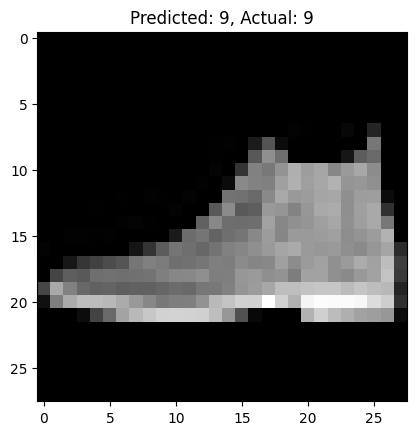

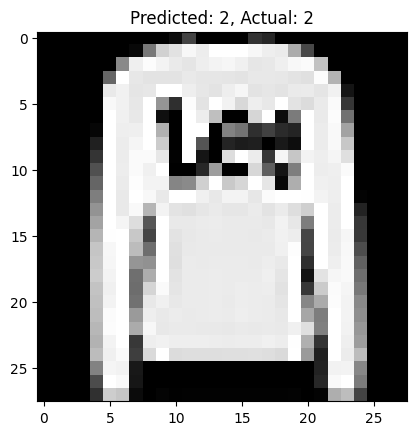

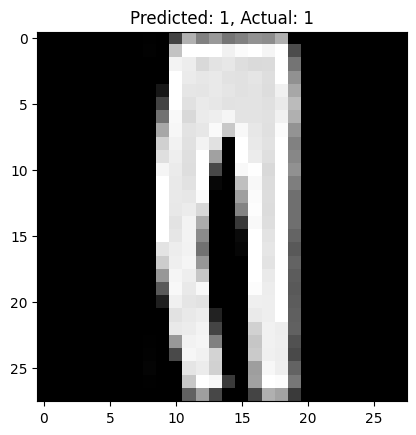

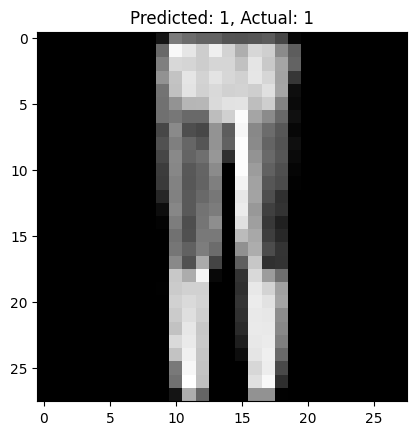

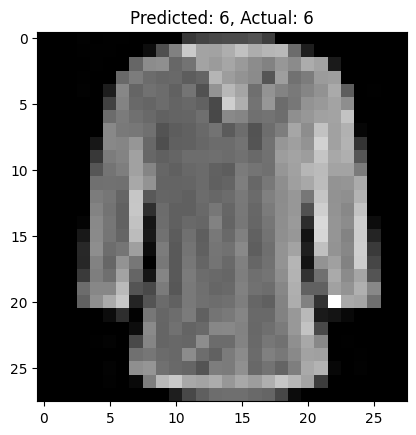

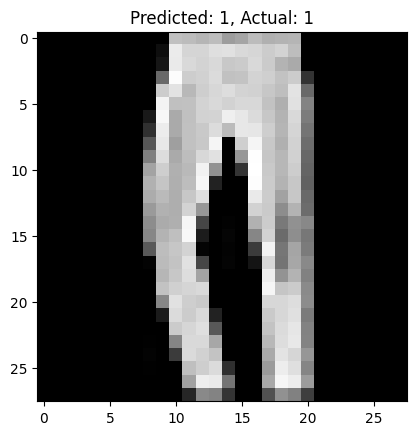

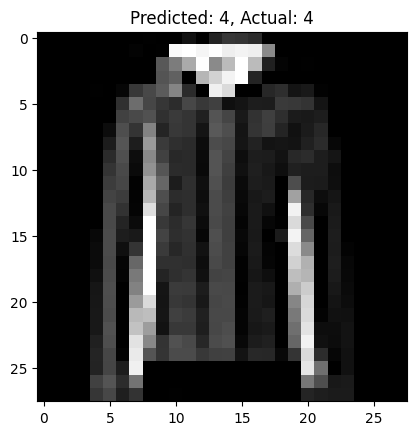

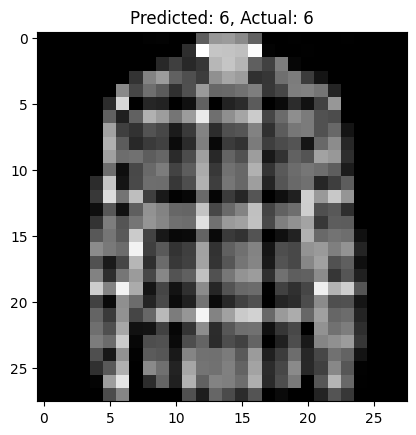

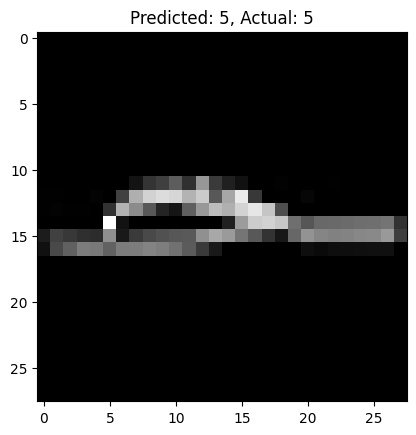

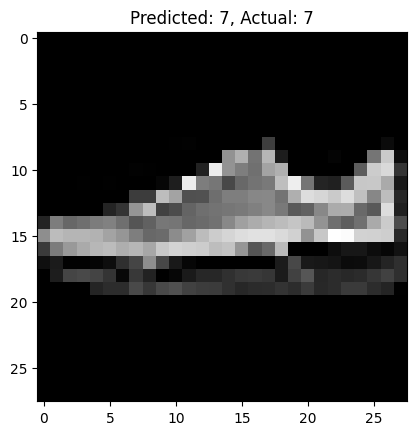

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the images
    Dense(128, activation='relu'),  # Hidden layer
    Dense(10, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy}")

# Visualize sample predictions
predictions = model.predict(test_images[:10])
for i in range(10):
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Predicted: {predictions[i].argmax()}, Actual: {test_labels[i]}")
    plt.show()


In [1]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Define the model architecture (similar to paper baseline)
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(100, activation='relu'),  # First hidden layer with 100 neurons
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='sgd',  # Stochastic Gradient Descent as used in the paper
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Save predictions for analysis
predictions = model.predict(x_test)
np.savetxt("predictions.csv", predictions, delimiter=",")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6563 - loss: 1.0798 - val_accuracy: 0.8138 - val_loss: 0.5679
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8183 - loss: 0.5414 - val_accuracy: 0.8298 - val_loss: 0.4902
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8339 - loss: 0.4876 - val_accuracy: 0.8318 - val_loss: 0.4671
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8413 - loss: 0.4628 - val_accuracy: 0.8420 - val_loss: 0.4427
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8496 - loss: 0.4395 - val_accuracy: 0.8513 - val_loss: 0.4294
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8532 - loss: 0.4221 - val_accuracy: 0.8537 - val_loss: 0.4165
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8578 - loss: 0.4094 - val_accuracy: 0.8565 - val_loss: 0.4064
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8602 - loss: 0.4017 - 

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6594 - loss: 1.0803 - val_accuracy: 0.8033 - val_loss: 0.5771
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8162 - loss: 0.5497 - val_accuracy: 0.8275 - val_loss: 0.4987
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8339 - loss: 0.4891 - val_accuracy: 0.8367 - val_loss: 0.4693
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8423 - loss: 0.4621 - val_accuracy: 0.8458 - val_loss: 0.4436
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8477 - loss: 0.4444 - val_accuracy: 0.8497 - val_loss: 0.4314
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8537 - loss: 0.4257 - val_accuracy: 0.8498 - val_loss: 0.4214
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8577 - loss: 0.4091 - val_accuracy: 0.8587 - val_loss: 0.4098
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8626 - loss: 0.4038 - 

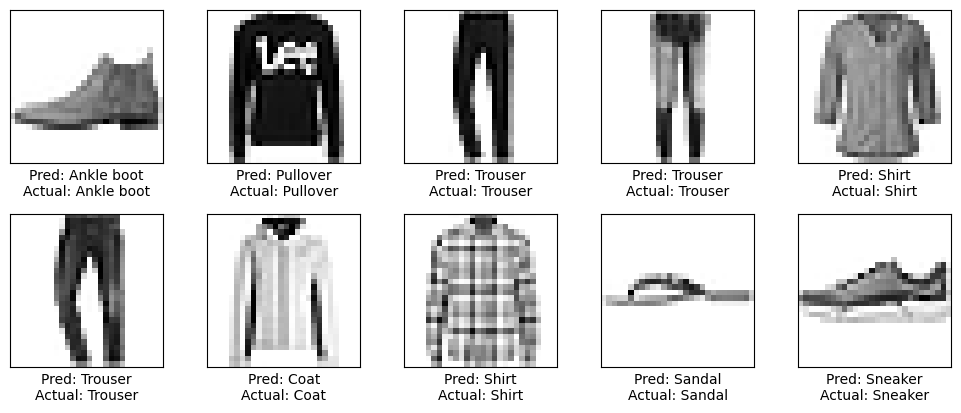

Predictions saved to predictions.csv


In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Define the model architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input images
    Dense(100, activation='relu'),  # First hidden layer with 100 neurons
    Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Compile the model
model.compile(optimizer='sgd',  # Stochastic Gradient Descent optimizer
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Generate predictions for the first 10 test images
predictions = model.predict(x_test[:10])

# Define class names for Fashion-MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualize the first 10 test images with predictions
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    actual_label = y_test[i]
    plt.xlabel(f"Pred: {class_names[predicted_label]}\nActual: {class_names[actual_label]}")
plt.tight_layout()
plt.show()

# Save the predictions to a CSV file
pred_labels = [np.argmax(pred) for pred in predictions]
results = pd.DataFrame({
    'Actual': [class_names[label] for label in y_test[:10]],
    'Predicted': [class_names[label] for label in pred_labels]
})
results.to_csv("predictions.csv", index=False)
print("Predictions saved to predictions.csv")
